In [1]:
import os

os.chdir('C:/Users/mogarcia/OneDrive/Escritorio/MCD-ITAM/CDAS/Pasteur')

In [2]:
 #Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
from nltk.corpus import stopwords
import nltk
import random
import demoji
from unidecode import unidecode


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
with open("2021-10-27-14-29-24-CDT-search-csv-export.csv", encoding='utf-8') as archivo:
   
    base_1=pd.read_table(archivo,delimiter = '\t')

archivo.close()

C:\Users\mogarcia\AppData\Local\R-MINI~1\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
base_1.shape

(299998, 40)

In [5]:
with open("2021-11-03-21-39-52-CST-search-csv-export.csv", encoding='utf-8') as archivo:
   
    base_2=pd.read_table(archivo,delimiter = '\t')

archivo.close()

C:\Users\mogarcia\AppData\Local\R-MINI~1\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
base_2.shape

(300000, 40)

In [7]:
bases=[base_1,base_2]
df=pd.concat(bases)

In [8]:
df.shape

(599998, 40)

In [9]:
#Eliminamos duplicados
df = df.drop_duplicates()

In [11]:
#Nulos y reseteo de index
df = df.dropna(how='any', subset=['Message']).reset_index(drop=True)

In [12]:
df

Page Name              User Name       Facebook Id  \
0           Guanajuato Sur Noticias          GuanajuatoSur   116533631798431   
1        Digital Noticias Michoacán    DigitalNoticiasMich   100044645704478   
2               Campeche Digital Mx         CampeDigitalMx   166788413383635   
3               Noticieros Televisa  NoticierosTelevisacom   105624182802445   
4                   Agencia Chiapas         AgenciaChiapas  1179249828824480   
...                             ...                    ...               ...   
540781                 Glocal Media         glocalmediacom   106790047556625   
540782    Tiempo La Noticia Digital                 tiempo      105269113990   
540783            Amigos Pro Animal        AmigosProAnimal      382072645033   
540784  Ultra Noticias Huauchinango       UltraNoticias917   188543258459630   
540785      Emprendedorpolitico.com  emprendedorpoliticomx  1652306261503303   

             Page Category Page Admin Top Country  \
0                    MEDIA                     MX   
1       MEDIA_NEWS_COMPANY                     MX   
2                COMMUNITY                     MX   
3       MEDIA_NEWS_COMPANY                     MX   
4       MEDIA_NEWS_COMPANY                     MX   
...                    ...                    ...   
540781  MEDIA_NEWS_COMPANY                     MX   
540782               MEDIA                     MX   
540783          NON_PROFIT                     MX   
540784       RADIO_STATION                     MX   
540785  MEDIA_NEWS_COMPANY                     MX   

                                         Page Description  \
0       Noticias y Reportajes de la Zona Sur del Estad...   
1                                     Portal informativo    
2       Se dedica a investigar las implicaciones cultu...   
3        Para entender la noticia. \nNoticieros Televisa.   
4       Compartimos tus denuncias y luchamos contra la...   
...                                                   ...   
540781  Somos un medio de comunicación que se caracter...   
540782  ¡La Noticia Ya! Periódico por internet con inf...   
540783  NO CONTAMOS CON ALBERGUE, por lo tanto no reci...   
540784  Ultra Noticias Huauchinango \n91.7 FM 8:00 am ...   
540785  Desnudamos la noticia para que estés enterado ...   

               Page Created  Likes at Posting  Followers at Posting  \
0       2011-12-26 18:16:08          150319.0              216905.0   
1       2017-01-23 04:48:04           50665.0               58595.0   
2       2011-06-06 02:31:22           12930.0               13867.0   
3       2010-03-26 01:07:29         8267499.0            12495903.0   
4       2016-08-06 22:34:08           13684.0               14440.0   
...                     ...               ...                   ...   
540781  2020-02-05 07:08:38            1072.0                1087.0   
540782  2009-07-19 17:12:31          748702.0              805250.0   
540783  2009-12-31 17:57:43          861694.0              865172.0   
540784  2018-05-03 19:51:49               NaN                   NaN   
540785  2018-01-18 00:23:00               NaN                   NaN   

                   Post Created  ...  \
0       2021-10-27 14:11:53 CDT  ...   
1       2021-10-27 14:10:17 CDT  ...   
2       2021-10-27 14:09:50 CDT  ...   
3       2021-10-27 14:09:04 CDT  ...   
4       2021-10-27 14:06:11 CDT  ...   
...                         ...  ...   
540781  2020-12-09 13:49:33 CST  ...   
540782  2020-12-09 13:49:24 CST  ...   
540783  2020-12-09 13:49:11 CST  ...   
540784  2020-12-09 13:48:54 CST  ...   
540785  2020-12-09 13:48:33 CST  ...   

                                                  Message  \
0       #SALVATIERRA https://www.facebook.com/69082778...   
1       En Noviembre vacunarán con Cansino a 300 mil r...   
2       PARTICIPARÁ IMSS CAMPECHE EN DÉCIMA JORNADA NA...   
3       La jornada de vacunación se realiza en 11 muni...   
4       Información importante sobre la vacunación a m..

In [13]:
df.shape

(540786, 40)

In [14]:
def limpieza(Message):
#Unidecode toma un objeto de cadena, que posiblemente contenga caracteres no ASCII, y devuelve una cadena que se puede 
#codificar de forma segura en ASCII. En este caso se utilizó para remover acentos y emojis
    Message = unidecode(Message)
#Minúsculas
    Message = Message.lower()
#Eliminar HashTags
    Message = re.sub("#[A-Za-z0-9_]+","", Message)
#Eliminar hipervínculos
    Message = re.sub(r'http\S+', '', Message)
#Eliminar signos de interrogación, exclamación y otros
    Message = re.sub(r'[^\w\s]', '', Message)
#----------------------
    return Message

In [15]:
nuevo_mensaje=[]
for i in df.Message:
    nm=limpieza(i)
    nuevo_mensaje.append(nm)

In [16]:
df["Nuevo_Mensaje"]=nuevo_mensaje

In [17]:
# Mensajes en limpios de hashtags, hipervínculos, signos de interrogación, exclamación y otros, y texto en minúsculas.
df.Nuevo_Mensaje

0                                                          
1         en noviembre vacunaran con cansino a 300 mil r...
2         participara imss campeche en decima jornada na...
3         la jornada de vacunacion se realiza en 11 muni...
4         informacion importante sobre la vacunacion a m...
                                ...                        
540781     hugo lopezgatell descarto suspender la vacuna...
540782    el creador de microsoft espera que en proximos...
540783    ayudemos a cambiar vidas tengo 3 perritos resc...
540784      l al informar 94 nuevos contagios y cuatro f...
540785       ya valio raza next que ocurre en el cuerpo ...
Name: Nuevo_Mensaje, Length: 540786, dtype: object

# FRECUENCIA DE PALABRAS

In [25]:
##### Función para limpiar mensajes
# convertir un documento en tokens limpios
def limpieza2(Message):
# dividido en tokens por espacio en blanco
    tokens = Message.split()
# preparar regex para el filtrado de caracteres
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# eliminar puntuación de cada palabra
    tokens = [re_punc.sub('', w) for w in tokens]
# eliminar los tokens restantes que no son alfabéticos
    tokens = [word for word in tokens if word.isalpha()]
# volver palabras a minúsculas
    tokens = [word.lower() for word in tokens]
# eliminar hipervínvulos
    tokens= [word for word in tokens if 'http' not in word]
# filtrar las palabras de parada
    stop_words = set(stopwords.words('spanish'))
    tokens = [w for w in tokens if not w in stop_words]
    return tokens

In [19]:
## Análisis de frecuencia de palabras para definir conjunto de palabras relevantes, se consideró una
## muestra aleatoria de aproximadamente el 10% de los mensajes.
aleatorios=[]
for i in range(54100):
    aleatorios.append(random.randrange(0, 54100))

In [26]:
#Función que crea una lista de las palabras del la muestra aleatoria
def palabras(df, aleatorio):
    palabras=[]
    for i in aleatorio:
        t=limpieza2(df.Nuevo_Mensaje[i])
        palabras=t+palabras
    return palabras

In [27]:
p=palabras(df,aleatorios)

In [28]:
#Función para ver la frecuencia de las palabras
def frecuencia(lista):
    dic={}
    for palabra in lista:
        if palabra in dic.keys():
            dic[palabra] = dic[palabra]+ 1     #La palabra ya existe.
        else:
            dic[palabra]= 1       #La palabra es nueva.
    return dic

frq=frecuencia(p)
frq_s=dict(sorted(frq.items(), key=lambda item: item[1], reverse=True))
frq_s

{'vacunacion': 36489,
 'dosis': 26317,
 'anos': 23703,
 'vacuna': 21368,
 'salud': 18532,
 'mas': 15735,
 'personas': 14875,
 'vacunas': 13656,
 'octubre': 13416,
 'mil': 11140,
 'mexico': 9314,
 'menores': 8882,
 'segunda': 8175,
 'edad': 7882,
 'gobierno': 7450,
 'poblacion': 7330,
 'aplicacion': 7030,
 'secretaria': 6500,
 'si': 6372,
 'jornada': 6198,
 'dia': 6108,
 'primera': 6021,
 'asi': 5685,
 'unidos': 5584,
 'ninos': 5319,
 'covid': 5304,
 'casos': 5226,
 'municipios': 4994,
 'millones': 4897,
 'nacional': 4799,
 'hoy': 4775,
 'pfizer': 4755,
 'noviembre': 4736,
 'atencion': 4449,
 'tambien': 4266,
 'partir': 4239,
 'presidente': 4174,
 'pandemia': 4126,
 'solo': 4107,
 'hospital': 4106,
 'general': 4098,
 'comorbilidades': 4021,
 'astrazeneca': 3996,
 'dijo': 3898,
 'dias': 3882,
 'municipio': 3876,
 'mayores': 3840,
 'pais': 3771,
 'rezagados': 3725,
 'informo': 3661,
 'jovenes': 3656,
 'informacion': 3628,
 'federal': 3596,
 'riesgo': 3593,
 'oms': 3574,
 'dos': 3560,
 'ho

In [29]:
# Almacenamos la frecuencia de palabras en un dataframe para hacer un plotbar
df_palabras=pd.DataFrame.from_dict(frq_s,orient='index').rename(columns={0:'freq'})
df_palabras

freq
vacunacion   36489
dosis        26317
anos         23703
vacuna       21368
salud        18532
...            ...
inocularlos      1
trasmita         1
vania            1
zarca            1
tilaco           1

[38511 rows x 1 columns]

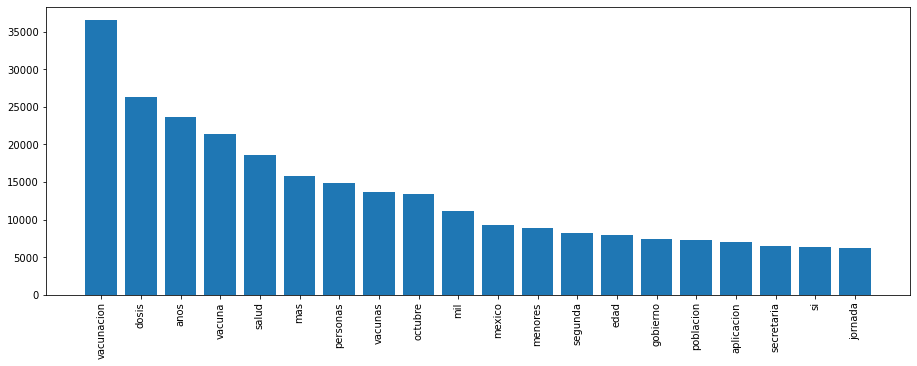

In [30]:

def plot_bar(data=df_palabras, top=20):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df_palabras.iloc[:top,:].index, height = df_palabras.iloc[:top,0].values)
    plt.xticks(rotation=90)
    plt.show()
    
    #Graficamos el TOP 20 de palabras por frecuencia
plot_bar(data=df_palabras, top=20)

# Análisis de Hashtags

In [31]:
#Función para localizar HashTags en los mensajes (los guarda en una lista que posteriormente se usará para agregar una columna al
#dataframe)
def HashTags(Message):
    tok=Message.split()
    ht=[]
    for i in tok:
        if '#' in i:
            ht.append(i)
    ht = [word.lower() for word in ht]
    return ht

In [47]:
ht_TOT=[]
for i in range(540786):
    h=HashTags(df.Message[i])
    ht_TOT.append(h)

In [48]:
df['Hashtags']=ht_TOT
df.Hashtags

0                                            [#salvatierra]
1                                              [#michoacán]
2                                                        []
3                                                        []
4                                                        []
                                ...                        
540781    [#nacional, #covid19, #glocalmedia, #laverdade...
540782                                                   []
540783                                                   []
540784    [#porsiteloperdiste, #miguelbarbosahuerta, #go...
540785                                             [#salud]
Name: Hashtags, Length: 540786, dtype: object

In [49]:
ht_TOT_2 = [x for l in ht_TOT for x in l]
frq_HT=frecuencia(ht_TOT_2)
frq_HT=dict(sorted(frq_HT.items(), key=lambda item: item[1], reverse=True))
frq_HT

{'#covid19': 42705,
 '#nacional': 11802,
 '#vacuna': 10732,
 '#salud': 9525,
 '#entérate': 9220,
 '#méxico': 8318,
 '#vacunación': 7157,
 '#covid19.': 7137,
 '#vacunas': 6742,
 '#internacional': 6529,
 '#noticias': 5835,
 '#covid19,': 5391,
 '#coronavirus': 5280,
 '#pfizer': 4989,
 '#covid': 4577,
 '#mundo': 3558,
 '#covid-19': 3521,
 '#últimahora': 3424,
 '#astrazeneca': 3344,
 '#puebla': 3157,
 '#covid_19': 2889,
 '#vacunacovid19': 2739,
 '#amlo': 2683,
 '#envivo': 2674,
 '#tamaulipas': 2376,
 '#pandemia': 2371,
 '#cdmx': 2353,
 '#estrategiadevacunación': 2268,
 '#coahuila': 2256,
 '#almomento': 2074,
 '#atención': 2024,
 '#veracruz': 1947,
 '#local': 1837,
 '#quintanaroo': 1695,
 '#quédateencasa': 1693,
 '#enterate': 1689,
 '#slp': 1684,
 '#nacionales': 1620,
 '#sputnikv': 1616,
 '#séfuerteméxico': 1557,
 '#saltillo': 1500,
 '#monclova': 1465,
 '#cuídateporloquemásquieras': 1370,
 '#edomex': 1368,
 '#campeche': 1366,
 '#video': 1296,
 '#sanadistancia': 1293,
 '#moderna': 1257,
 '#oa

In [50]:
# Almacenamos la frecuencia de palabras en un dataframe para hacer un plotbar
df_hashtags=pd.DataFrame.from_dict(frq_HT,orient='index').rename(columns={0:'ht'})
df_hashtags

ht
#covid19                     42705
#nacional                    11802
#vacuna                      10732
#salud                        9525
#entérate                     9220
...                            ...
#covid19🦠🔬,                      1
#municipiopróspero               1
#gobiernomunicipal2017-2021      1
🔴#atención🔴esta                  1
#automotriz                      1

[52734 rows x 1 columns]

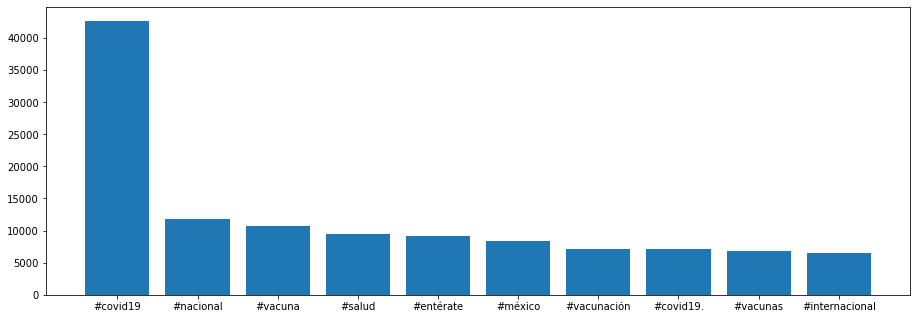

In [51]:
def plot_bar2(data=df_hashtags, top=10):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df_hashtags.iloc[:top,:].index, height = df_hashtags.iloc[:top,0].values)
    plt.show()
#Graficamos el TOP 10 de palabras por frecuencia
plot_bar2(data=df_hashtags, top=10)

# Análisis de emoticonos

In [52]:
#Función para localizar Emojis en los mensajes (los guarda en una lista que posteriormente se usará para agregar una columna al
#dataframe)
def Emojis(Message):
    de=demoji.findall(Message)
    values=list(de.values())
    return values

In [53]:
emoji_TOT=[]
for i in range(540786):
    e=Emojis(df.Message[i])
    emoji_TOT.append(e)

In [54]:
df['Emojis']=emoji_TOT

In [55]:
df.Emojis

0                                                        []
1                                                        []
2                                                        []
3                                                        []
4                            [backhand index pointing down]
                                ...                        
540781                                                   []
540782                                                   []
540783    [smiling face with smiling eyes, frowning face...
540784                 [syringe, speaking head, down arrow]
540785          [microbe, face with medical mask, beer mug]
Name: Emojis, Length: 540786, dtype: object

In [56]:
emoji_TOT_2 = [x for l in emoji_TOT for x in l]
frq_EMOJI=frecuencia(emoji_TOT_2)
frq_EMOJI=dict(sorted(frq_EMOJI.items(), key=lambda item: item[1], reverse=True))
frq_EMOJI

{'syringe': 61474,
 'red circle': 19494,
 'backhand index pointing down': 15599,
 'face with medical mask': 14539,
 'microbe': 12883,
 'backhand index pointing right': 10376,
 'police car light': 10031,
 'warning': 8188,
 'right arrow': 8141,
 'flag: Mexico': 7413,
 'check mark button': 6092,
 'down arrow': 5909,
 'round pushpin': 5735,
 'double exclamation mark': 5099,
 'newspaper': 4716,
 'mobile phone with arrow': 4325,
 'pushpin': 4044,
 'megaphone': 3269,
 'blue circle': 2751,
 'face screaming in fear': 2643,
 'backhand index pointing down: light skin tone': 2485,
 'right arrow curving down': 2402,
 'thinking face': 2358,
 'loudspeaker': 2205,
 'hollow red circle': 2187,
 'dog face': 2132,
 'play button': 2086,
 'stop sign': 2061,
 'camera with flash': 2036,
 'clapping hands': 1921,
 'red heart': 1904,
 'eyes': 1856,
 'laptop': 1849,
 'globe showing Americas': 1825,
 'spiral calendar': 1812,
 'flag: United States': 1805,
 'backhand index pointing down: medium-light skin tone': 176

In [57]:
df_emojis=pd.DataFrame.from_dict(frq_EMOJI,orient='index').rename(columns={0:'ht'})
df_emojis

ht
syringe                          61474
red circle                       19494
backhand index pointing down     15599
face with medical mask           14539
microbe                          12883
...                                ...
vulcan salute: medium skin tone      1
flag in hole                         1
thong sandal                         1
sewing needle                        1
feather                              1

[2080 rows x 1 columns]

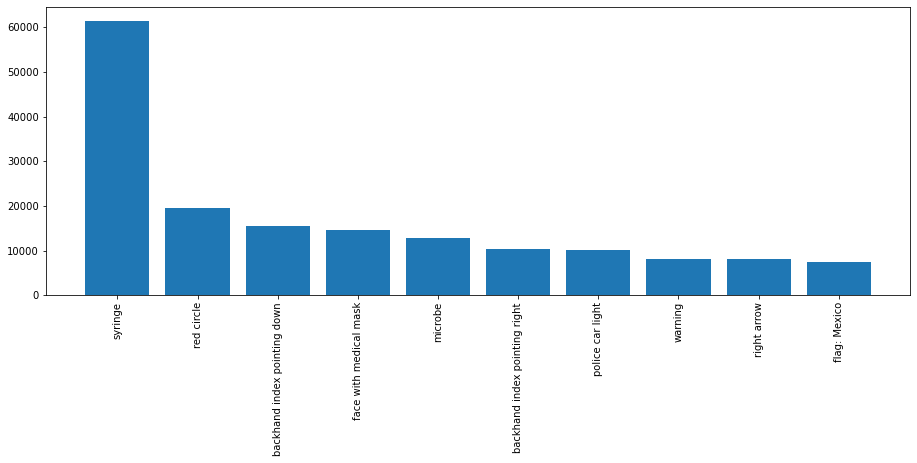

In [58]:
def plot_bar3(data=df_emojis, top=10):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df_emojis.iloc[:top,:].index, height = df_emojis.iloc[:top,0].values)
    plt.xticks(rotation=90)
    plt.show()
#Graficamos el TOP 10 de palabras por frecuencia
plot_bar3(data=df_emojis, top=10)

# TSNE

In [59]:
datos=df.sample(n=10000)

In [60]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

np.random.seed(19680801)
cvec = CountVectorizer(stop_words=stopwords.words('spanish')).fit(datos['Nuevo_Mensaje'])
bow = 1*(cvec.transform(datos['Nuevo_Mensaje'])>0)

C:\Users\mogarcia\AppData\Local\R-MINI~1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


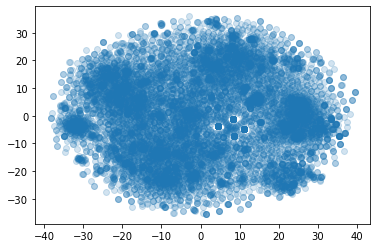

In [61]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=120, learning_rate='auto')
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

# KMEANS

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer


#Definimos al TF-IDF Vectorizer Object, transforma las letras en ocurrencias. Quitamos todas las stopwords
tfidf = TfidfVectorizer(stop_words=stopwords.words('spanish'),encoding='ascii')

vectors = tfidf.fit_transform(datos['Nuevo_Mensaje'])

In [18]:
ts2=pd.DataFrame(tsne.fit_transform(bow),columns=['tsne1', 'tsne2'])

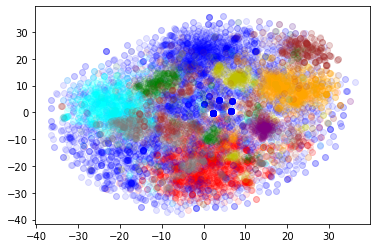

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
colores = ['r', 'b', 'g', 'y', 'orange', 'cyan', 'purple', 'grey','orange','brown','darkgrey']
#colores = ['red', 'blue', 'black', 'yellow', 'green', 'cyan', 'purple','grey']
km.fit(vectors)

for i in range(10):
    plt.scatter(
        ts2[km.labels_ == i].tsne1,
        ts2[km.labels_ == i].tsne2,
        alpha=0.1, color=colores[i])
plt.show()

In [20]:
ts2['label_kmeans']=km.labels_
ts2

tsne1      tsne2  label_kmeans
0     12.907791 -22.798611             0
1    -15.747460  11.001089             2
2      7.454708 -11.622724             0
3    -18.493116   9.878197             5
4      7.503778  14.343258             3
...         ...        ...           ...
9995   2.040508  19.747850             1
9996 -11.831808   8.884743             2
9997  -9.547256  -2.760371             9
9998  -3.888907 -20.774141             0
9999   2.859992  21.113329             1

[10000 rows x 3 columns]

# HDBSCAN

In [26]:
from hdbscan import HDBSCAN

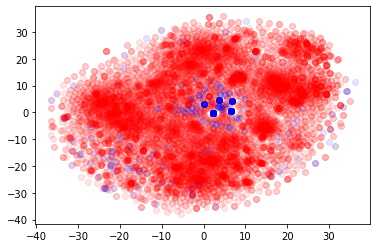

In [27]:
#colores=sns.color_palette("Spectral",100)
colores = ['red', 'blue', 'black', 'yellow', 'green', 'orange', 'blueviolet', 'darkgreen', 'gray']

hdb = HDBSCAN( min_cluster_size=100, min_samples=300, metric='cosine')

hdb_labs = hdb.fit_predict(vectors)

for i in np.unique(hdb_labs):
    plt.scatter(
        ts2[hdb_labs == i].tsne1,
        ts2[hdb_labs == i].tsne2,
        alpha=0.1, color=colores[i])
plt.show()

# Palabras por cluster

In [45]:
hdb = HDBSCAN( min_cluster_size=100, min_samples=300, metric='cosine')

%time hdb.fit(tfidf_matrix)

Wall time: 10.9 s


HDBSCAN(metric='cosine', min_cluster_size=100, min_samples=300)

In [46]:
joblib.dump(hdb,  'doc_cluster_2.pkl')

hdb = joblib.load('doc_cluster_2.pkl')
clusters = hdb.labels_.tolist()

In [47]:
datos.shape

(10000, 41)

In [48]:
km.labels_.shape

(10000,)

In [49]:
cluster_text=datos.assign(cluster=km.labels_).groupby("cluster").Nuevo_Mensaje.apply(" ".join)

In [50]:
tfidf_vectorizer= TfidfVectorizer(stop_words=stopwords.words('spanish'),encoding='ascii', use_idf=True,
                                  sublinear_tf=True,max_df=0.8)

In [51]:
%time tfidf_cluster = tfidf_vectorizer.fit_transform(cluster_text)

Wall time: 679 ms


In [52]:
%time tfidf_cluster_model = tfidf_vectorizer.fit(cluster_text)
%time tfidf_cluster = tfidf_cluster_model.transform(cluster_text)

Wall time: 565 ms
Wall time: 399 ms


In [53]:
tfidf_cluster.indptr

array([    0,  5484,  8769, 22262, 35742, 37868, 39253, 41580, 43058,
       44566, 46800], dtype=int32)

In [54]:
np.diff(tfidf_cluster.indptr)

array([ 5484,  3285, 13493, 13480,  2126,  1385,  2327,  1478,  1508,
        2234], dtype=int32)

In [55]:
nombres_var=pd.DataFrame({"indice":range(tfidf_cluster_model.get_feature_names_out().shape[0]),
                             "palabra":tfidf_cluster_model.get_feature_names_out()})

In [56]:
(
    pd.DataFrame({"indice":tfidf_cluster.indices,"datos":tfidf_cluster.data})
    .assign(rows=lambda x:np.repeat(list(range(10)),np.diff(tfidf_cluster.indptr)))
    .merge(nombres_var)
    .sort_values("datos",ascending=False)
    .groupby("rows")
    .head(10)
    .sort_values(["rows","datos"],ascending=[True,False])
    .groupby("rows")
    .palabra
    .apply(",".join)
)

rows
0    jj,noruega,epivaccorona,sobredosis,malaria,cli...
1    canina,antirrabica,etal,lymphadenopathy,felina...
2    kambo,catolico,incendio,carnival,mosquitos,por...
3    autocuidado,urbina,huixtla,caborca,acumulandos...
4    infografias,compostela,recuadro,anexo,descarga...
5    digestivo,pulmonar,amparo,padezcan,congenitas,...
6    radiologos,camilleros,775,enfermeria,875,rique...
7    almoloya,atempa,se34,publicaremos,zacatipan,fa...
8    presidentelopez,ruina,vladimir,perfeccionamien...
9    envasadas,585,aicm,slaoui,755,fam,42900,birmex...
Name: palabra, dtype: object

### Cluster 0: marcas vacunas y eficacia

In [82]:
cluster_text[0]

'    vacuna de la covid y reacciones alergicas  se ha informado de la deteccion de dos casos de reacciones alergicas tras la administracion de la vacuna btn162b2 de pfizerbiontech en el reino unido el dia 9 de diciembre dos receptores de la vacuna dos sanitarios han presentado un evento alergico poco despues de la vacunacion se hace referencia solo a que eran personas que portaban un autoinyector de adrenalina lo que hace suponer que habrian experimentado anteriores reacciones alergicas graves y que se recuperaron completamente the guardian bbc otros medios hacen referencia a que podria tratarse en realidad de fenomenos anafilactoides aunque esto parece solo una disquisicion teorica  novartis fabricara dosis de la vacuna de pfizer  y la vacuna de pfizer ni siquiera esta en el catalogo de la onu la rusa y la argentina apenas pasan del 50 de efectividad y han resultadomortales en adult0s may0res  el mapa de la desigualdad asi va la vacunacion contra el coronavirus en el mundo la oms aler

In [91]:
cluster_dict=datos.assign(cluster=km.labels_).groupby("cluster").Nuevo_Mensaje.groups
l0=list(cluster_dict[0])
random.choices(l0,k=10)

[237166, 534008, 337893, 471628, 40957, 133074, 167772, 511875, 494877, 268615]

In [81]:
df.Message[537294]

'#news #medical #vacuna 🏥🥼 ¡VACUNA DE LA COVID Y REACCIONES ALÉRGICAS! 🧠🚑 Se ha informado de la detección de dos casos de reacciones alérgicas tras la administración de la vacuna BTN162b2 de Pfizer&BioNTech en el Reino Unido. El día 9 de diciembre, dos receptores de la vacuna, dos sanitarios, han presentado un evento alérgico poco después de la vacunación. Se hace referencia solo a que eran personas que portaban un autoinyector de adrenalina (lo que hace suponer que habrían experimentado anteriores reacciones alérgicas graves) y que se recuperaron completamente (The Guardian, BBC). Otros medios hacen referencia a que podría tratarse en realidad de fenómenos anafilactoides, aunque esto parece solo una disquisición teórica. https://vacunasaep.org/profesionales/noticias/vacuna-de-la-covid-y-reacciones-alergicas'

In [84]:
df.Message[353366]

'Y la vacuna de Pfizer ni siquiera está en el catálogo de la ONU, la rusa y la argentina apenas pasan del 50% de efectividad y han resultadoMortales en adult0s may0res !!!'

In [92]:
df.Message[237166]

'#VACUNA. - En Estados Unidos la vacuna #Pfizer contra COVID-19 ya fue #aprobada para su uso comercial, ya se podrá vender directamente a los CONSUMIDORES de ese país. 👇'

In [96]:
df.Message[534008]

'AstraZeneca buscará combinar su vacuna contra #COVID19 con la Sputnik rusa. #Coronavirus #Latinus #InformaciónParaTi https://latinus.us/2020/12/11/astrazeneca-buscara-combinar-vacuna-contra-covid-sputnik-rusa/'

In [97]:
df.Message[337893]

'#Zihuatanejo | #SondeoMeganoticias ¿Es adulto mayor? ¿Qué opina de la vacuna contra el #COVID19?'

In [93]:
df.Message[471628]

'(Excélsior) Sube de tono disputa por vacuna. Se confrontan Morena y el PAN.'

In [94]:
df.Message[40957]

'Al parecer la vacuna china de CanSino salió igual que los jueguetes que nos envían, no sirvió para una...🤬 Protección eficaz. El premio nacional de Salud 2020, el internista e infectólogo, doctor Francisco Moreno Sánchez, recomendó buscar la protección de otra vacuna, luego de recibir la vacuna CanSino.'

In [95]:
df.Message[133074]

'#RMINoticias 🌐| PFIZER AFIRMA QUE SU VACUNA FUNCIONA EN NIÑOS DE 5 A 11 AÑOS Pfizer y BioNTech aseguraron este lunes que su vacuna contra Covid-19 indujo una sólida respuesta inmune en niños de 5 a 11 años, y planean pedir autorización para usar la vacuna en infantes de ese rango de edad en Estados Unidos, Europa y otros lugares lo antes posible. Las compañías afirmaron que la vacuna generó una respuesta inmune en niños de 5 a 11 años en su ensayo clínico de Fase II/III que coincidió con lo que habían observado previamente en personas de 16 a 25 años. El perfil de seguridad también en general comparable al del grupo de mayor edad, dijeron. “Desde julio, los casos pediátricos de Covid-19 han aumentado en aproximadamente un 240% en Estados Unidos, lo que subraya la necesidad de vacunación para la salud pública”, declaró el presidente ejecutivo de Pfizer, Albert Bourla, en un comunicado de prensa. “Los resultados de estos ensayos proporcionan una base sólida para buscar la autorización d

In [98]:
df.Message[167772]

'Con la finalidad de agilizar más el proceso de #vacunación, la Secretaría de Bienestar en #Sinaloa otorgará citas con fechas y horarios establecidos, para las personas interesadas en recibir la vacuna contra el #COVID19'

In [99]:
df.Message[511875]

'🎅El mundo de la ciencia se puso gorro y barbota blanca para convertirse en Santa Claus y nos trajo la vacuna🤣 🤔Peeeero, todavia quedan varias preguntas para Pfizer: ¿Qué es?, ¿cómo funciona?, ¿cuándo nos tocará?💉 En este video te explicamos todo sobre la vacuna que convertirá a México en el quinto país a nivel mundial que la aplicará👇'

In [100]:
df.Message[494877]

'Llegó el primer lote de la vacuna de Pfizer-BioNTech contra COVID-19 l para iniciar con el plan de vacunación en territorio nacional. Este es un recuento del camino que ha tomado tener la vacuna en México.'

In [102]:
df.Message[268615]

'Moderna informó que su vacuna mantiene una efectividad del 93 por ciento seis meses después de la segunda inyección'

### Cluster 1

In [106]:
l1=list(cluster_dict[1])
random.choices(l1,k=10)

[67059, 173945, 164299, 70053, 108992, 114560, 158782, 295986, 65803, 394755]

In [104]:
df.Message[180689]

'#CortaLaInfodemia Falso que las variantes del #COVID19 sean consecuencia de la vacunación. ❎ https://bit.ly/3jPpX5q ✅ https://bit.ly/2VswoCk Sitio infodemia: https://infodemia.mx/'

In [105]:
df.Message[56060]

'#Entérate 🧐 | Reconoció que Guanajuato presenta un rezago en la vacunación contra la Covid-19 y anunció que el próximo jueves serían enviadas al estado alrededor de 800 mil dosis.'

In [107]:
df.Message[67059]

'#Puebla | 🔴Los jóvenes abarrotan en primer día de vacunación, también los rezagados 🦠💉'

In [108]:
df.Message[173945]

'Ya hay una gran fila para la vacunación de #COVID19 en el CESSA de #Tlatlauquitepec 💉💉'

In [109]:
df.Message[164299]

'HOY CONTINÚA LA VACUNACIÓN ANTICOVID AL SEGMENTO DE 40 AÑOS EN ADELANTE • Llaman a aplicarse la vacuna contra el Covid 19 en Cajeme, el biológico es Pfizer Carolina Zazueta, servidora de la nación, encargada de la vacunación en plaza Sendero de Ciudad Obregón, exhortó a los habitantes que no se han aplicado la vacuna contra el Covid 19, a asistir a los tres puntos que se asignaron en Cajeme, comentó que desde las 8 de la mañana empezaron solamente con el segmento de edad de 40 años en adelante, pero también se considerará a menores de 40 que tengan algún problema de salud o discapacidad. Dijo que durante este día el proceso ha resultado muy favorable y no se han presentado problemas. Con información de Agencia ICE | Joel Gutiérrez'

In [110]:
df.Message[70053]

'Tercer día de Vacunación 18-29 años'

In [111]:
df.Message[108992]

'No habrá vacunación contra Covid el próximo lunes en Jalisco, pero ya se cuenta con el mayor cargamento de dosis para la jornada, informó la SSJ'

### Cluster 2: alternativo, opinión

In [127]:
l2=list(cluster_dict[2])
l2[:10]

[332686, 268632, 370412, 433400, 62991, 168798, 320497, 104142, 184411, 511945]

In [113]:
df.Message[332686]

'Miguel Ángel Riquelme Solís, Gobernador de Coahuila informó que con la llegada de la última remesa de vacunas anticovid, se completa la aplicación al servicio médico'

In [114]:
df.Message[268632]

'➡️El miedo no anda en Burro, pero el COVID Tampoco.. Así yo mero en la vacuna el jueves 🤣 miedoso pa la aguja 💉, mis respetos a la joven y a los jóvenes que a pesar del miedo a la inyección y reacciones secundarias es primero la salud de ellos y de todos! ❤️ video: Selide e imelda escobedo #ceromiedo #CdVictoria'

In [115]:
df.Message[370412]

'¿Con qué rapidez las vacunas contra la COVID-19 podrían frenar la pandemia? ¿Las vacunas contra la COVID-19 proporcionarán protección a largo plazo? Estas y más preguntas nos responderá el Dr. Mauricio Rodríguez. Reserva tu lugar en comunidad.cultura.unam.mx Enero 22, 16 h. 🦠💉🔬'

In [116]:
df.Message[433400]

'🔴Sus creadores sostuvieron que tiene una tasa de eficiencia del 79%. 🔴'

In [117]:
df.Message[62991]

'💉 Si por algún motivo necesitas cancelar tu cita para la vacuna contra el COVID-19 en el AMG, a continuación te compartimos el paso a paso de cómo hacerlo. Toma nota y comparte esta valiosa información. 😉'

In [157]:
random.choices(l2,k=5)

[436986, 147545, 404854, 264221, 436317]

In [158]:
df.Message[436986]

'El mandatario aseguró que, tras su llegada, las vacunas comenzaran a distribuirse por todo el país'

In [159]:
df.Message[147545]

'A punta de amparos obligan a las autoridades a que los vacunaran'

In [160]:
df.Message[404854]

'💉👉 Aún existe un porcentaje de la población que duda de la eficacia de las vacunas debido a los mitos que las rodean; lee aquí información confirmada.'

In [161]:
df.Message[264221]

'“No caeremos en su trampa ¡malditos neoliberales, lo de la tercera dosis es porque quieren vender más vacunas y lucrar con nuestra salud”, escribió Laisha Wilkins en redes'

In [162]:
df.Message[436317]

'🚨El Presidente sostuvo que no se permitirá que las personas se “cuelen” y que aquellas que logren hacerlo serán denunciadas ➡️ https://cutt.ly/fjfduPj:=:https://www.olivanoticias.com/nacional/147999/amlo_pide_respetar_plan_de_vacunacion_por_edad_no_hagan_el_ridiculo_dice #OlivaNoticias #Nacional #Multimedios'

### Cluster 8: Andrés Manuel

In [128]:
l8=list(cluster_dict[8])
l8[:10]

[358295, 129208, 45872, 294744, 195539, 52154, 427599, 471003, 366283, 485435]

In [129]:
df.Message[358295]

'Marco Antonio Aguilar Cortés Parece no tener remedio el padecimiento del presidente Andrés Manuel López Obrador: todo lo ve, y lo trata, como política electoral.... https://lazetanoticias.com/2021/01/18/vacunas-por-votos-incurable-enfermedad-de-amlo/'

In [130]:
df.Message[129208]

'🔴#AHORA|📹 Conferencia de prensa del presidente Andrés Manuel López Obrador.'

In [131]:
df.Message[45872]

'🚨 #ENTERATEYCOMPARTE #México #Covid19 #AMLO AMLO hace llamado a OMS para que apruebe vacunas contra COVID-19 🧐 Andrés Manuel López Obrador OPS/OMS México - PAHO/WHO Mexico 📰 #PeriódicoUnnimedios Nota completa: 👇 https://unnimedios.com.mx/amlo-hace-llamado-a-oms-para-que-apruebe-vacunas-contra-covid-19/'

In [132]:
df.Message[294744]

'¡Ojo! A muchas personas que no llevaban la prueba negativa #COVID_19 no les permitieron tomar su vuelo para Estados Unidos. Además, la evolución en la salud del presidente López Obrador y la llamada para ofrecer la vacuna en adultos mayores. #PicandoLaNoticia'

In [133]:
df.Message[195539]

'Siguen llegando vacunas a Chiapas gracias al Gobierno Federal que encabeza el presidente Andrés Manuel López Obrador. Por ello, les decimos a todas y todos los chiapanecos que tenemos suficientes dosis para combatir el virus. Aprovechemos la vacuna y salvemos la vida.'

In [134]:
df.Message[52154]

'#DesdePuebla Conferencia del presidente Andrés Manuel López Obrador.'

In [135]:
df.Message[485435]

'#Entérate || Lo vamos a lograr: AMLO sobre distribución de vacuna en lugares más apartados A donde sea, se va a llegar con la vacuna, porque contamos con el apoyo de las Fuerzas Armadas, expresó el presidente Andrés Manuel López Obrador'

In [137]:
random.choices(l8,k=3)

[474472, 314391, 357925]

In [138]:
df.Message[474472]

'Oaxaca de Juárez, 27 de diciembre. Este domingo inició la segunda fase del plan de vacunación contra la Covid en México. La Segunda Jornada, que iniciaría el lunes 28 se adelantó un día tras un encuentro entre el presidente Andrés Manuel López Obrador, la jefa de Gobierno de la Ciudad de México Claudia Sheinbaum y representantes de la Secretaría de Salud.... https://www.adnsureste.info/adelantan-vacunacion-contra-la-covid-en-mexico-1400-h/:=:https://www.adnsureste.info/adelantan-vacunacion-contra-la-covid-en-mexico-1345-h/'

In [139]:
df.Message[314391]

'López Obrador sostendrá la conversación el lunes con el mandatario ruso Vladimir Putin, sobre el suministro de la vacuna Sputnik V'

In [140]:
df.Message[357925]

'López Obrador destacó que esto no modificaría la estrategia pactada para proteger a la población ante la pandemia.'

### Cluster 5: Vacunación en jóvenes

In [141]:
l5=list(cluster_dict[5])
l5[:10]

[33095, 85731, 18318, 112076, 93284, 164820, 93117, 183237, 437530, 121129]

In [142]:
df.Message[33095]

'#locales Inicia la vacunación a menores de edad con comorbilidades en Chiapas A partir de este lunes, a las 8 de la mañana, el Hospital de Especialidades Pediátricas, ubicado en al oriente de Tuxtla Gutiérrez, iniciará con la vacunación contra COVID-19 a pacientes de 12 a 17 años con comorbilidades que incrementan el riesgo de enfermedad grave. Los interesados deberán realizar su registro, a través de https://mivacuna.salud.gob.mx/index.php. Piden a los usuarios portar cubreboca y respetar la sana distancia.'

In [143]:
df.Message[85731]

'Gobierno abre registro de vacunación contra Covid-19 para menores con comorbilidades http://ajuaa.com/?p=201874'

In [144]:
df.Message[18318]

'Conoce las enfermedades o padecimientos de riesgo en menores de 12 a 17 años susceptibles de ser vacunados contra el #Covid19.'

In [145]:
df.Message[112076]

'A la vacunación de más de 62 millones de mexicanos, que representan el 70% de la población mayor de 18 años de edad, se sumarán niños, niñas y adolescentes de 12 a 17 años con comorbilidades. El registro para ser vacunados inicia el 1 de octubre aquí👇 https://mivacuna.salud.gob.mx/index.php'

In [146]:
df.Message[93284]

'Entrega PRD Guerrero primeras solicitudes de amparo ante juzgado federal, para vacunar a menores contra COVID-19 Chilpancingo, Guerrero, 29 de septiembre de 2021.- Integrantes de la Dirección Estatal Ejecutiva del PRD presentaron hoy, ante la Oficialía Común de los Juzgados Federales de distrito, 27 solicitudes de amparos para que menores de edad puedan ser vacunados contra el Covid-19. El dirigente del partido en Guerrero, Alberto Catalán Bastida, estuvo acompañado de Marco Antonio Organiz, Eleazar Sierra, Mario Ruiz y Moisés Acevedo, todos miembros de la DEE. Catalán Bastida informó que la recepción de solicitudes de amparo, continuará en los municipios donde se instalaron mesas receptoras, para ello los interesados (menores de 12 A 17 años), deberán acudir a las sedes municipales del Sol Azteca. Donde, de igual forma que hoy en Chilpancingo, se acudirá a los juzgados federales de cada municipio para dar trámite a las solicitudes de amparo. El dirigente del PRD dijo que en estos día

In [147]:
random.choices(l5,k=5)

[89786, 72449, 160829, 105094, 6921]

In [148]:
df.Message[89786]

'‼️A T E N C I ÓN 🔴Mañana 1º de octubre inicia el registro para la vacunación contra #COVID19 a niñas, niños y jóvenes de 12 a 17 años con comorbilidades. Esta convocatoria incluye a personas embarazadas adolescentes. Recibirán la vacuna Pfizer BioNTech.'

In [149]:
df.Message[72449]

'Se espera que la próxima semana ya estén llegando a Sinaloa vacunas contra COVID-19 para niños de 12 a 17 años con comorbilidades adelantó el Gobernador de Sinaloa, Quirino Ordaz Coppel.'

In [150]:
df.Message[160829]

'Este martes 14 de septiembre se iniciará con la etapa de inmunización a los primeros mil jóvenes de 12 a 17 años en el Municipio de Piedras Negras.'

In [151]:
df.Message[105094]

'#Juárez | Oficialmente el 1 de octubre se habilitará registro de vacunación para adolescentes con comorbilidades'

### Cluster 3: Noticias

In [164]:
l3=list(cluster_dict[3])
l3[:5]

[434254, 521722, 19754, 120337, 27919]

In [165]:
df.Message[434254]

'Se suman las contradicciones en el equipo de salud y el gobierno federal sobre el mecanismo de vacunación que se aplicará en México. Hay más promesas que hechos. A las 11 PM les contamos la historia por ADN40mx'

In [166]:
df.Message[521722]

'Gobierno de México afina detalles para iniciar campaña de vacunación contra la COVID-19, CDMX.- El cuerpo técnico afina detalles para el arranque de la vacunación contra la COVID-19 en Coahuila y la CDMX, informó el subsecretario Hugo López-Gatell. Agregó que ayer empezó una sesión de trabajo larga en Coahuila y mañana estarán en CDMX el grupo técnico para refinar los últimos detalles en las dos zonas de arranque de la vacunación. “Recordar que esto es solo el arranque y ante la inquietud del número de vacunas que en este momento se planea poner con la primera dotación que será en los últimos días del mes de diciembre". El subsecretario indicó que la vacunación será “sin descanso” además de que será gratuita durante todo el 2021, “nos llevará varios meses en 2021, ejercer esta acción de vacunación. Tenemos la potencial colaboración con otros sectores de la población”. Detalló que se realizrá un ensayo en la CDMX con personal médico para la aplicación de la vacuna y añadió que el próxi

In [167]:
df.Message[19754]

'Gobierno de Sonora y consulado estadounidense trabajan para la reapertura de la frontera -El gobernador Alfonso Durazo se reunió con el cónsul general del vecino país a fin de detallar el inicio de actividades en los pasos fronterizos entre Sonora y Arizona Hermosillo, Sonora; 21 de octubre de 2021.- Ante la inminente apertura de la frontera entre México y Estados Unidos en noviembre próximo, el gobernador Alfonso Durazo se reunió con Ken Roy, cónsul general del vecino país en Hermosillo, para coordinar acciones que lleven a los ciudadanos de ambos países a un cruce seguro y ordenado. En sus redes sociales el mandatario estatal informó que la buena respuesta obtenida por la campaña nacional de vacunación se refleja en esta decisión binacional, con la que se espera, además, reactivar sectores económicos que a lo largo de la pandemia se han visto afectados de forma severa. “Estamos trabajando de manera coordinada con el gobierno de EUA, para que el flujo de personas sea eficiente y segu

In [169]:
df.Message[120337]

'Trabajó DIF en beneficio de los adultos mayores del municipio Se les brindó atención con calidad y calidez en Casa de Día, CAIAM, grupos de la tercera edad, Jalisco te reconoce, entre otros servicios Durante seis años de trabajo por los adultos mayores, el Sistema DIF Municipal de Puerto Vallarta, logró incrementar los apoyos a este sector con proyectos y programas integrales, que permitieron mejorar su calidad de vida a través del eje “Adultos mayores con valores”. En el programa ‘Casa de Día’, a lo largo de estos años se otorgaron más de 80 mil servicios a jóvenes de la tercera edad, para mantenerlos activos en esta etapa de su vida, con los servicios de belleza que incluye corte de cabello, manicura, pedicura y tinte; homeopatía, rehabilitación física con apoyo de un quiropráctico y estudiantes de la carrera de terapia física y rehabilitación; talleres de canto, baile y pintura, el comedor asistencial, así como las actividades que se desarrollan en los 31 grupos de la tercera edad.

In [168]:
df.Message[27919]

'En la SEMANA NACIONAL DEL CONOCIMIENTO cuyo lema es Ciencia, Tecnología e Innovación para la Salud, el Coqcyt, a través de la #RedPlaetariosQRoo, te invita a la videoconferencia: "Avances de la vacunación en México y enseñanzas de la pandemia. ¿Qué es lo que sigue?", impartida por la Dra. Vanessa Lopez Guerrero, miembro de la Sociedad Mexicana De Virología 👉 Conéctate el : VIERNES 22 de Octubre / 4:00 PM'

In [170]:
random.choices(l3,k=5)

[177647, 375053, 66794, 241372, 152965]

In [171]:
df.Message[177647]

'#CHIAPAS | CHIAPAS ESTÁ EN SEMÁFORO VERDE, PERO EL RIESGO DE CONTAGIO CONTINÚA: RUTILIO ESCANDÓN • El gobernador informó que en la entidad se encuentran activos 68 Centros de Vacunación anticovid Luego de subrayar que Chiapas va bien en el control y combate al COVID-19, el gobernador Rutilio Escandón Cadenas reiteró la convocatoria a la población de 18 años en adelante a aprovechar la oportunidad de acudir a cualquiera de los 68 Centros de Vacunación que se encuentran activos en la entidad, para recibir la vacuna, a fin de proteger la salud y vida tanto propia como de los seres queridos, ante esta enfermedad. LEE LA NOTA COMPLETA AQUÍ 👉 https://bit.ly/3tpQkSD'

In [172]:
df.Message[375053]

'DAN POSITIVO A COVID-19 HOY 17 PERSONAS; AVANZA APLICACIÓN DE VACUNA EN UN 54% La secretaría de salud del estado reportó el día de hoy que se han aplicado 2 mil 632 dosis de la vacuna contra la Covid-19, lo que representa un 54% de avance en la aplicación de la dosis. En su reporte técnico epidemiológico se procesaron 87 pruebas donde se confirmaron 17 casos positivos nuevos, 70 negativos y cero defunciones registrada en la plataforma nacional. Están a la espera de resultados, 175 personas resultados, se tiene en todo el estado 38 casos activos de los cuales 7 pacientes se encuentran en estado crítico. Wilmer Delgado.'

In [173]:
df.Message[66794]

'#Salud | importante que la población asuma con responsabilidad las medidas de prevención.'

In [174]:
df.Message[241372]

'#DE_ÚLTIMA_HORA 💢ATENCIÓN💢 🔺SST registra este domingo 223 casos nuevos de covid-19 en #Tamaulipas 🔺De ellos, 21 son de #Matamoros La secretaria de Salud, Gloria Molina Gamboa advirtió hoy que Tamaulipas se encuentra en riesgo máximo por la tercera ola COVID que está afectando principalmente a jóvenes y personas no vacunadas, por lo que hizo un llamado urgente a la población a no relajar las medidas preventivas, aun quienes ya cuenten con alguna dosis o su esquema completo de vacunación anticovd, evitar reuniones sociales y quedarse en casa el mayor tiempo posible. Pidió mantener el control de enfermedades como obesidad, hipertensión o diabetes, utilizar cubrebocas en todos los espacios públicos, lavarse las manos de 10 a 20 veces por día, utilizar alcohol gel al 70 por ciento, mantener una distancia mínima de 2 metros con otras personas, desinfectar superficies y objetos de uso común, ventilar todas las áreas de la casa y evitar el contacto con personas enfermas de las vías respirator

In [175]:
df.Message[152965]

'AGRADECEN AL PERSONAL DE SALUD Y DE LOGÍSTICA POR SU PARTICIPACIÓN EN LAS JORNADAS DE VACUNACIÓN ANTICOVID. Acuña, Coah.- 14 de Septiembre de 2021.- Con un encuentro y desayuno, CANACINTRA Acuña y la Administración Municipal agradecieron al personal de salud y de logística, su participación desde el mes de febrero en la campaña nacional de vacunación anticovid. A temprana hora, en salón de eventos, organismos empresariales de Acuña y la Administración Municipal agradecieron su colaboración y el esfuerzo depositado en cada proceso de vacunación, desde su inicio en febrero, dirigido a las personas adultas mayores, hasta el recién concluido, de segunda dosis para el grupo poblacional de 18 a 39 años. En representación del Gobierno de Unidad asistió el alcalde Roberto de los Santos Vazquez; el secretario del ayuntamiento Felipe Basulto Corona y la secretaria técnica Ángela Salinas Borrego. Jornada que presidieron, entre otros, el presidente de la CANACINTRA Trinidad Herrera Fernández; el 

### Cluster 6: personal médico

In [182]:
l6=list(cluster_dict[6])
l6[:5]

[422419, 494075, 424144, 406598, 420287]

In [183]:
df.Message[422419]

'#Salud 💉 La aplicación de la #vacuna contra el #Covid19 al personal médico se realizará en Tepic, Bahía de Banderas y Santiago Ixcuintla. 💻 www.Meganoticias.mx:=:https://www.Meganoticias.mx/ 📲 Conoce los detalles aquí https://bit.ly/3q1Uf5f:=:https://www.meganoticias.mx/tepic/noticia/proximo-martes-arranca-vacunacion-contra-el-covid-19-en-nayarit/210285'

In [184]:
df.Message[494075]

'Las primeras dosis se aplicarán a trabajadores de la Salud de primera línea de combate contra el #Covid_19 en hospitales de #CDMX y #Saltillo'

In [185]:
df.Message[424144]

'En Línea Directa hoy Viernes 8 de Enero del 2021! Dios les bendiga y proteja siempre a todos ustedes 🙏❤️! - Llega la vacuna contra el covid-19 apartir del Martes 12 de Enero a Campeche para vacunar sólo al personal médico de primera línea de lucha contra la pandemia! Estaremos vigilando que no se use el influyentismo y no lo usen los políticos para su beneficio!'

In [186]:
df.Message[406598]

'Las 19 mil 500 vacunas que llegarán hoy a Jalisco estarán destinadas a personal que atiende casos de Covid-19. ¿Estás de acuerdo?'

In [187]:
df.Message[420287]

'🔴 #ÚltimaHora Vacuna del covid-19 se pondrán a personal médicos en los hospitales donde laboran y no en instalaciones militares. -El Gobernador Mauricio Vila Dosal se reunió este día con el coordinador Estatal para la Vacunación Covid-19, Capitán de Corbeta Carlos Gómez Montes de Oca, quien le informó que en Yucatán la vacunación del personal de salud de las áreas Covid se realizará en hospitales en los que laboran. -Asimismo, el Gobernador adelantó que se instalará el Consejo estatal de Vacunación. https://www.yucatanencorto.com/noticias/vacuna-del-covid-19-se-pondran-a-personal-medicos-en-los-hospitales-donde-laboran-y-no-en-instalaciones-militares/'

In [189]:
random.choices(l6,k=5)

[340346, 393661, 532645, 384125, 368400]

In [190]:
df.Message[340346]

'Llegan a Sinaloa el segundo paquete de vacunas contra Covid-19 Este miércoles llegó a Sinaloa la segunda remesa de vacunas contra el Covid-19, con un total de 2 mil 925 dosis que serán distribuidos en los diferentes hospitales del estado, donde se encuentra personal médico atendiendo la primera línea de batalla contra el virus, informó el Secretario de Salud en la entidad, Efrén Encinas Torres. Detalló que, esta segunda remesa complementará, pero no en su totalidad, al personal que se encuentra de manera directa atendiendo a pacientes Covid en salas de urgencias y áreas clínicas, por lo que la cantidad de dosis enviada por parte de la federación continúa siendo exclusiva para personal médico. Asimismo, detalló que de las 2 mil 925 dosis de vacunas, se incluyeron para los Hospitales Generales de Escuinapa, Guasave, La Cruz de Elota, Culiacán, Los Mochis y Guamuchil. También se entregaron dosis a los Hospitales Integrales de Concordia, Cosala, Valle de San Lorenzo además de IMSS de Vill

In [191]:
df.Message[393661]

'#AlertaSalud El gobernador Francisco Domínguez Servién dijo que si las vacunas llegan a tiempo, cada semana estarán aplicando las dosis al personal de salud. https://www.alertaqronoticias.com/2021/01/13/vacunacion-a-todo-el-personal-de-salud-en-queretaro-preven-que-concluira-el-1-de-febrero/'

In [192]:
df.Message[532645]

'#Local 🗞 |El plan de vacunación contra Covid-19 que a nivel nacional ha sido propuesto por parte del Gobierno Federal, ha sido esperanzador y alentador entre el personal de la salud.'

In [193]:
df.Message[384125]

'Aplican 105 dosis de vacuna contra Covid en Pinotepa #Pinotepa #Oaxaca ||Participaron en la vacunación de la dosis contra el #COVID19 en médicos, personal de enfermería y administrativo, así como de intendencia del ISSSTE.'

In [194]:
df.Message[368400]

'COAHUILA FORTALECE SUS UNIDADES MÉDICAS: MARS • En La Laguna, el gobernador Miguel Riquelme entrega vales de equipo médico a directores de los hospitales generales de San Pedro de las Colonias y de Torreón, así como a los integrales de Francisco I. Madero y Matamoros Torreón, Coahuila de Zaragoza; a 15 de Enero de 2021.- Durante el evento de entrega de equipamiento e insumos para unidades de Salud de Coahuila, el gobernador Miguel Ángel Riquelme Solís reconoció que con la llegada de la vacuna se ve una luz al final del túnel, pero que todavía faltan cosas por hacer y por lo tanto debemos seguir trabajando unidos. En la ceremonia que se llevó a cabo en el Hospital General de Torreón, el Mandatario estatal agradeció al personal de Salud de toda la entidad por su trabajo comprometido y responsable durante esta pandemia, y reiteró que la prioridad de su Gobierno es la salud. Riquelme Solís informó que su Administración destinará 132 millones de pesos este año a este rubro para adquirir to

### Cluster 7: fechas y lugares de vacunación

In [195]:
l7=list(cluster_dict[7])
l7[:5]

[116382, 273194, 10084, 84588, 364115]

In [196]:
df.Message[116382]

'#llamado 🔴 Se adelantó que es muy posible que la jornada de segundas dosis a mayores de 18 años iniciarán entre el 4 y el 8 de octubre #Vacuna #Covid #salud #Virus'

In [197]:
df.Message[273194]

'#Morelia | ➡️ Jóvenes de 18 a 29 años de edad comenzaron a llegar desde este domingo a los módulos de vacunación contra Covid-19 Ver más... 👇🏽 https://cbtelevision.com.mx/ya-se-ven-las-filas-en-los-modulos-de-vacunacion-en-morelia/'

In [198]:
df.Message[10084]

'👉 #PorSiNoLoViste | Esta semana aplicarán segunda dosis de la vacuna contra Covid-19 de Pfizer a población de 18 a 29 años de #JalpaDeMéndez, #Nacajuca, #Tacotalpa y #Teapa. 💉'

In [199]:
df.Message[84588]

'📍 Salud 😷 #COVID19 | #vacunaciónanticovid 💉 𝗖𝗢𝗠𝗜𝗘𝗡𝗭𝗔 𝗟𝗔 𝗩𝗔𝗖𝗨𝗡𝗔 𝗗𝗘 𝟭𝟴 𝗔 𝟮𝟵 𝗔𝗡̃𝗢𝗦 𝗥𝗘𝗚𝗜𝗢𝗡 𝗔𝗟𝗧𝗢𝗦 𝗡𝗢𝗥𝗧𝗘 El próximo miércoles 06 de octubre iniciará la aplicación de la vacuna contra el #COVID19 en jóvenes en la Región Altos Norte. Los municipios en lo que se aplicará la vacuna son: Lagos de Moreno, San Juan de los Lagos, Encarnación de Díaz, Unión de San Antonio y San Diego de Alejandría. El jueves 07 de octubre iniciará en Ojuelos de Jalisco. En Lagos de Moreno la sede será el auditorio de la Unidad Deportiva "Zarco Pedroza". La vacuna que se aplicará es AstraZeneca y la meta son 27,500 dosis. En San Juan de los Lagos la sede será en el estacionamiento del Hospital Comunitario, la vacuna es AstraZeneca y la cantidad para aplicar son 12,700 dosis. En Encarnación de Díaz la sede será el Gimnasio Municipal con Cansino de una dosis, la cantidad para aplicar es 8,400 dosis. En Ojuelos de Jalisco la sede será el salón de eventos La Providencia, en calle Zaragoza No. 10, vacunando con Cansino d

In [200]:
df.Message[364115]

'👩\u200d⚕️🥰⏳Frecuencia de citas con el o la Pediatra - La primera cita a los 7 días de vida - Mes con mes hasta los 12 meses - A partir de los 12 meses cada 2 a 3 meses - A partir de los 3 años cada 4 a 6 meses - A partir de los 6 años anualmente hasta los 18 años - Cuando se presente una urgencia #drafannyneonatologa #pediatria #breastfeeding #asesoriaenlinea #asesoriaenalimentacioncomplementaria #asesoriaenlactancia #vacunas💙'

In [202]:
random.choices(l7,k=5)

[127202, 11707, 173536, 248282, 40862]

In [203]:
df.Message[127202]

'Madrugan jóvenes por vacuna en #Altamira 📌 Con largas filas, arranca la vacunación contra el covid-19 en Altamira para jóvenes de 18 a 29 años de edad, quienes acudieron a las tres sedes de aplicación desde la madrugada de este martes. Son mas de 39 mil primeras dosis las que se otorgarán a este sector de la población. 📷 Sergio Sánchez'

In [204]:
df.Message[11707]

'#Convocatoria #2daDosis Si vives en #TulaDeAllende y tienes de 18 a 29 años, acude a las sedes para que te apliquen la segunda dosis de la #Vacuna 💉 contra la #Covid-19 de acuerdo a la convocatoria 👇 ¡No faltes!'

In [205]:
df.Message[173536]

'#AlMomento✅🤓💉| INICIA PENÚLTIMO DÍA DE VACUNACIÓN PARA 18 A 29 AÑOS EN #TIZAYUCA Este jueves inició el penúltimo día de la segunda jornada de vacunación contra el coronavirus Covid-19, para las personas con el rango de edad de 18 a 29 años en Tizayuca. Hasta triples filas se observaron en la sede de inoculación ubicada en la primaria Reynaldo Gómez Aldana, mejor conocida como "El Campito" y el Auditorio municipal, adonde se dieron cita habitantes de fraccionamientos y colonias como Fuentes de Tizayuca, 2 de Octubre, Paseos de El Pedregal, entre otras. De acuerdo a la Jurisdicción Sanitaria de Tizayuca, serán colocadas durante la semana alrededor de 28 mil dosis, donde hasta el corte del martes han sido inmunizadas alrededor de 12 mil 500 personas. Asimismo, la indicación que dan los Servidores de la Nación, pertenencias a la Delegación del Bienestar es que, por el momento, no habrá vacuna para las personas que acudan en condiciones de rezago. Se espera que la actividad se extienda has

In [206]:
df.Message[248282]

'Concluye hoy vacunación en Técpan y Atoyac *En Benito Juárez dejaron de vacunar a los de 18 y 29 años desde ayer jueves por la tarde. Por J. Alberto Solís Loeza Técpan, San Jerónimo y Atoyac; 20 de agosto de 2021.-Debido a la solicitud de miles de jóvenes del rango de edad de entre los 18 y 29 años, desde hoy viernes dejarán de aplicar la vacuna Sinovac en los macrocentros ubicados tanto en Técpan como en la ciudad de Atoyac de Álvarez. En tanto que en la cabecera municipal de Benito Juárez, San Jerónimo, esta acción la dejaron de hacer personal de Salud y del Bienestar Social desde ayer jueves por la tarde. En el caso de Atoyac el centro de aplicación del medicamento para la inmunidad contra la Covid-19, es la unidad deportiva Silvestre Mariscal, mientras que en la ciudad de Técpan de Galeana, el lugar de concentración para recibir la inoculación, es la sede de la escuela primaria Hermenegildo Galeana, sitios que han sido vigilados siempre por miembros de las fuerzas armadas federale

In [207]:
df.Message[40862]

'#ValleDeSantiago.- Vacunación Covid-19 a jóvenes de 18 a 29 años con gran respuesta de la ciudadanía, filas de hasta 1 kilómetro de distancia, pero fluye de manera ágil. Se destinaron 31,200 dosis de la vacuna Sputnik para el rango de edad mencionado, así como rezagados de 30 años en adelante sin ninguna vacuna aplicada.'

### Cluster 9: llegada y número de vacunas

In [209]:
l9=list(cluster_dict[9])
l9[:5]

[350723, 410337, 320906, 488484, 418585]

In [210]:
df.Message[350723]

'Llegan a Coahuila 3,900 vacunas Pfizer. Este fin de semana comenzará la vacunación a maestros en un estado #ATiempoTvCDMX'

In [211]:
df.Message[410337]

'#MañaneraAMLO🌤| HOY llegan más de 400 mil dosis de la vacuna contra el #Covid19 ☣️.'

In [212]:
df.Message[320906]

'Busca IP adquirir 10 millones de vacunas contra Covid-19 http://ow.ly/roYH50Dgd2K:=:https://aristeguinoticias.com/2201/mexico/busca-ip-adquirir-10-millones-de-vacunas/'

In [213]:
df.Message[488484]

'Dice radio pasillo que de las 3 mil vacunas que llegaron a México. 2000 ya se aplicaron familiares de diputados, senadores de MORENA'

In [214]:
df.Message[418585]

'Llegan 13 mil #vacunas #COVID19 a #Oaxaca a finales de enero. Llegarán 13 mil dosis la última semana de enero y otras 13 mil la última de febrero, y a partir de marzo 10 mil dosis cada semana, dió a conocer Juan Carlos Márquez Heine subsecretario de los Servicios de Salud de Oaxaca. ¡MUY BUENA NOTICIA!'

In [216]:
random.choices(l9,k=5)

[384934, 10189, 101495, 307720, 93391]

In [217]:
df.Message[384934]

'#SALVATIERRA "LLEGA LAS PRIMERAS VACUNAS PARA MEDICOS Y ENFERMERAS" https://guanajuatosur.com/2021/01/llega-las-primeras-vacunas-para-medicos-y-enfermeras/'

In [218]:
df.Message[10189]

'México ha recibido 99 millones 068 mil 355 dosis en total de Pfizer-BioNTech, AstraZeneca, Sinovac, CanSino Biologics, Johnson & Johnson y Moderna #México #Coronavirus'

In [219]:
df.Message[101495]

'En Quintana Roo poco más de 600 mil personas tienen esquema completo de vacunación contra la COVID-19 Chetumal.- De enero al corte de las 13 horas de este día, del esquema de dos dosis se han aplicado en Quintana Roo un millón 610 mil 201, de las cuales corresponden a la primera un millón 015 mil 124, y a la segunda, 595 mil 077, informó la Secretaría de Salud del Estado. Info: https://www.expedientequintanaroo.com/2021/09/en-quintana-roo-poco-mas-de-600-mil.html'

In [220]:
df.Message[307720]

'Iniciamos las noticias #EnVivo 😎 -#AMLO da positivo por COVID-19 😷 -Acuerda Rusia 🇷🇺 mandar a México 🇲🇽 24 millones de vacunas contra el COVID-19 en los próximos 2 meses 💉 -Protestan en Chilpancingo por falta de agua desde hace 2 meses 💦'

In [221]:
df.Message[93391]

'¡México supera las 100,000,000 de dosis aplicadas contra el COVID-19.! ¡México supera las 100,000,000 de dosis aplicadas contra el COVID-19.! ¡México supera las 100,000,000 de dosis aplicadas contra el COVID-19.!'

### Cluster 4: aplicación de vacunas a adutos

In [222]:
l4=list(cluster_dict[4])
random.choices(l4,k=10)

[82044, 245312, 274645, 263616, 177243, 57152, 245225, 229132, 242664, 161804]

In [223]:
df.Message[82044]

'#BIENESTAR INFORMA: Convocatoria de vacunación para la Zona Norte de Guerrero. 03/10/2021 A partir del miércoles 6 de octubre dara la aplicación de la segunda dosis #AstraZeneca a personas de 30 a 39 años y mujeres embarazadas. La vacunación se llevará a cabo en orden alfabético. Acudan con identificación oficial, comprobante de primera dosis y expediente de vacunación impreso, generado en https://mivacuna.salud.gob.mx/index.php Los municipios que no aparecen en esta convocatoria es porque ya fueron atendidos con la vacuna CanSino, la cuál no necesita segunda aplicación.'

In [224]:
df.Message[245312]

'🔴Inicia aplicación de segunda dosis contra el Covid-19 para jóvenes de 30 a 39 años en Zacatecas y Guadalupe Este sábado inició la aplicación de la segunda dosis de la vacuna contra el Covid-19 para las personas de 30 a 39 años y mujeres embarazadas de Guadalupe y Zacatecas. Con orden y entusiasmo, las y los jóvenes treintañeros acuden desde temprana hora a los siete módulos de vacunación habilitados para la aplicación de la vacuna, donde son atendidos por los integrantes de las Brigadas Correcaminos. En Zacatecas, la vacuna se aplica en el Campus UAZ Siglo XXI y en las instalaciones de la FENAZA. En Guadalupe, los módulos se ubican en la comunidad Tacoaleche, asi como en la Presidencia Municipal, el CECATI 130, Conalep y Escuela Primaria Eulalia Guzmán Barrón. Las actividades de vacunación continuarán los días domingo y lunes. Los horarios se publicarán en medios oficiales.'

In [225]:
df.Message[274645]

'#Molango 💉💉 Segunda Dosis 40-49 Las personas de 40 a 49 años que ya recibieron su primer dosis de la #Vacuna contra el #Covid19, en el municipio de Molango, ya pueden acudir a recibir su segunda aplicación. 🗓️Asiste al punto de vacunación que corresponda a tu localidad. Recuerda que para agilizar tu atención debes llevar credencial de elector, comprobante de primer vacuna y expediente de vacunación con QR, llenado a mano con tus datos. Descárgalo en la página https://mivacuna.salud.gob.mx. También te recomendamos llevar un bolígrafo azul. 🖊 Si te cuidas tú, nos cuidamos todas y todos.'

In [226]:
df.Message[263616]

'SE APLICARÁ SOLO SEGUNDA DOSIS DE VACUNA PFIZER A GRUPOS DE EDADES DE 18 Y MÁS: DR. ACOSTA📰 OJINAGA._El jefe de los Servicios de Salud, sub sede Ojinaga, Dr. Manuel Jesús Acosta Muñoz, dio a conocer que el programa de vacunación que se llevará a cabo miercoles 18, jueves 19 y viernes 20 de agosto del 2021, contempla solo la vacuna para grupos de edades de 18 años y más en la segunda dosis. Indicó que entiende que hubo personas que cuando se aplicó la primera dosis estaban enfermos, no se encontraban en la ciudad y otras personas por alguna otra razón no se aplicaron el biológico, sin embargo hasta el momento no está autorizada la aplicación de la primera vacuna en esta ocasión. El galeno mencionó que es muy posible que próximamente se pueda vacunar a las personas que están faltando en la aplicación de la primera vacuna. La vacunación se realizará en el poliforo, a partir de las 9:00 horas, se estará llevando a cabo, como en otras ocasiones conforme a la primera letra del apellido de l

In [227]:
df.Message[177243]

'#LasChoapas #VacunaciónAntiCovid19 Confirmarán fecha de segunda dosis esta semana en Las Choapas \u200bEste miércoles trascendió el mensaje de una supuesta fecha de vacunación para la segunda dosis de la vacuna AstraZeneca en Las Choapas. Se trataría de la aplicación de la segunda dosis a las personas de 30 a 59 años, además de los rezagados, a quienes se les inocularía el viernes 10 de septiembre. https://www.presencia.mx/nota.aspx?id=183489&s=3'

In [228]:
df.Message[57152]

'A partir de hoy, se aplicó la segunda dosis para las personas que tienen entre 30 y 39 años, en el municipio de Veracruz.'

In [237]:
df.Message[245225]

'A partir del próximo lunes 23 de agosto inicia una nueva etapa de vacunación en 53 municipios del estado. Personas de 40 a 49 años de 51 municipios del estado recibirán a partir del lunes 23 de agosto la segunda dosis de la vacuna AstraZeneca contra el Coronavirus, con lo que se dará cobertura a toda la población de Yucatán en este rango de edad, informó la Secretaría de Salud estatal (SSY). La SSY dio a conocer que el lunes 23 de agosto también comenzará la administración de la primera dosis de la vacuna AstraZeneca a las personas de 18 a 29 años de los municipios de Kanasín y Tizimín, por lo que con esta jornada se cubrirá a este sector de la población de 105 municipios del estado y solo quedará pendiente Mérida. La dependencia estatal precisó que, las dosis de la farmacéutica AstraZeneca se administrarán del lunes 23 al viernes 27 de agosto de la siguiente forma: -El próximo lunes 23 de agosto arrancará este proceso con la vacunación de la primera dosis a jóvenes yucatecos de 18-29

In [238]:
df.Message[229132]

'Mañana la vacunación en #Xilitla El día de mañana jueves 26 se estará aplicando en el municipio de Xilitla la segunda dosis de la vacuna #Astrazeneca a adultos de 50 años en adelante y mujeres embarazadas que ya hayan recibido la primera dosis...'